# Jackknife法の確認

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from math import sqrt

In [2]:
np.random.seed(1)

In [3]:
def sample(n):
  """正規乱数をn個返す"""
  return np.random.randn(n)

## データに相関が無い場合

### ガウス分布していることを確認

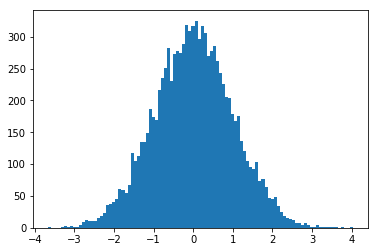

In [4]:
x = sample(10000)
fig, ax = plt.subplots()
n, bins, _ = ax.hist(x, bins=100)

In [5]:
def estimator_simple(r, bin_size):
  """シンプルなEstimator, bin_sizeごとに分けて平均してからビンダー比を計算"""
  u = []
  for i in range(0, len(r), bin_size):
    r_i = r[i:i+bin_size]
    r2 = np.average(r_i**2)
    r4 = np.average(r_i**4)
    u.append(r4/r2**2)
  return np.average(u)

### Simple Estimatorのビンサイズ依存性

In [6]:
n_total = 65536
r = sample(n_total)
bins = [16, 32,64,  256]
for bin_size in bins:
    u = estimator_simple(r, bin_size)
    print(f"{bin_size} {u}")

16 2.661837588829295
32 2.826250240837523
64 2.91938696536417
256 2.97651997031031


In [7]:
def estimator_jackknife(r, bin_size):
  """Jackknife法によるEstimator"""
  u = []
  n = len(r)//bin_size
  r2 = r ** 2
  r4 = r ** 4
  u_all = np.average(r4)/np.average(r2)**2
  r2 = [np.average(r2[i:i+bin_size]) for i in range(0, len(r), bin_size)]
  r4 = [np.average(r4[i:i+bin_size]) for i in range(0, len(r), bin_size)]
  for i in range(n):
    r2_i = np.average(np.delete(r2,i))
    r4_i = np.average(np.delete(r4,i))
    u.append(r4_i/r2_i**2)
  return n*u_all - (n-1)*np.average(u)

### Jackknife Estimatorのビンサイズ依存性

In [8]:
n_total = 256*256
r = sample(n_total)
bins = [16, 32, 64, 256]
for bin_size in bins:
    u = estimator_jackknife(r, bin_size)
    print(f"{bin_size} {u}")

16 3.0165304353467945
32 3.0165298042857103
64 3.0165290721974998
256 3.016534133315531


In [9]:
def compare_plot(r):
  """データを受け取り、二つのEstimatorで推定した結果のビンサイズ依存性を調べる"""
  bins = [16,32,64, 256]
  x = 1.0/np.array(bins)
  u_simple = []
  u_jackknife = []
  for bin_size in bins:
    u_simple.append(estimator_simple(r, bin_size))
    u_jackknife.append(estimator_jackknife(r, bin_size))
  plt.figure()
  fig, ax = plt.subplots()
  plt.xlabel("1 / n")
  plt.ylabel("estimated value")
  plt.ylim([0,4])
  u_theory = [3 for _ in x]
  ax.plot(x, u_theory,"-", lw=0.5, label="3", color="black")
  ax.plot(x, u_simple,".-", lw=0.5, label="Simple")
  ax.plot(x, u_jackknife,".-", lw=0.5, label="Jackknife")
  ax.legend()

### 無相関のデータでのビンサイズ依存性

<Figure size 432x288 with 0 Axes>

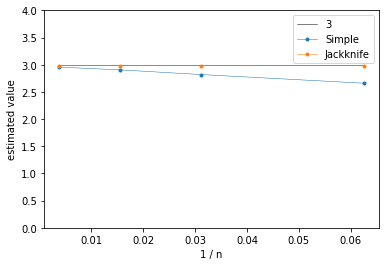

In [10]:
n_total = 65536
r = sample(n_total)
compare_plot(r)

## データに相関がある場合

In [11]:
def langevin(n):
  """Langevin方程式によりデータを生成する"""
  h = 0.1          # 時間刻み
  gamma = 0.01      # 減衰係数
  v0 = 0.0         # 初速
  v = v0
  r = []
  for _ in range(n):
    v = v -gamma * v * h + np.random.normal(0, sqrt(h))
    r.append(v)
  return np.array(r)

### 相関のあるデータがガウス分布になることを確認

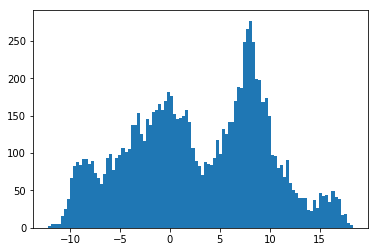

In [12]:
x = langevin(10000)
fig, ax = plt.subplots()
n, bins, _ = ax.hist(x, bins=100)

### データに相関がある場合のビンサイズ依存性

<Figure size 432x288 with 0 Axes>

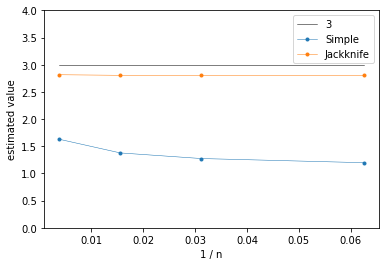

In [13]:
n_total = 65536
r = langevin(n_total)
compare_plot(r)